## Исследование проката самокатов фирмы Go Fast
Заказчик: фирма проката самокатов Go Fast.  
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. 
Сервисом можно пользоваться:  
без подписки:

    + абонентская плата отсутствует;
    + стоимость одной минуты поездки — 8 рублей;
    + стоимость старта (начала поездки) — 50 рублей;
с подпиской Ultra:

    + абонентская плата — 199 рублей в месяц;
    + стоимость одной минуты поездки — 6 рублей;
    + стоимость старта — бесплатно.

***Цель исследования:*** проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.  
***План исследования:***
1. Загрузка и знакомство с данными.
2. Предобработка данных, работа с пропусками, дубликатами.
3. Исследовательский анализ проката самокатов. Описание и визуализация общей информации о пользователях и поездках.
4. Объединение данных.
5. Подсчет выручки от каждого пользователя по месяцам.
6. Проверка гипотез.
7. Решение задач от отдела маркетинга.

## Описание данных

Пользователи — `users_go.csv`:
+ `user_id` - уникальный идентификатор пользователя;
+ `name` - имя пользователя;
+ `age` - возраст;
+ `city` - город;
+ `subscription_type` - тип подписки (free, ultra).

Поездки — `rides_go.csv`:
+ `user_id` - уникальный идентификатор пользователя;
+ `distance` - расстояние, которое пользователь проехал в текущей сессии (в метрах);
+ `duration` - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»;
+ `date` - дата совершения поездки.

Подписки — `subscriptions_go.csv`:
+ `subscription_type` - тип подписки;
+ `minute_price` - стоимость одной минуты поездки по данной подписке;
+ `start_ride_price` - стоимость начала поездки;
+ `subscription_fee` - стоимость ежемесячного платежа.


# Шаг 1

#### 1.1. Открытие и первичное знакомство с данными.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import factorial
from math import sqrt
import numpy as np
import seaborn as sns
from scipy import stats as st
from scipy.stats import binom, norm

In [2]:
try:
    users = pd.read_csv('/datasets/users_go.csv')
    rides = pd.read_csv('/datasets/rides_go.csv')
    sub = pd.read_csv('/datasets/subscriptions_go.csv')
    
except:
    users = pd.read_csv('/Users/user/Desktop/Курсы/Яндекс/4 спринт/users_go.csv')
    rides = pd.read_csv('/Users/user/Desktop/Курсы/Яндекс/4 спринт/rides_go.csv')
    sub = pd.read_csv('/Users/user/Desktop/Курсы/Яндекс/4 спринт/subscriptions_go.csv')
    
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)

print(display(users.head(5)), users.info())
print(display(rides.head(5)),rides.info())
print(display(sub.head(5)),sub.info())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None None


,user_id,distance,duration,date
0,1,"4,409.92",25.60,2021-01-01
1,1,"2,617.59",15.82,2021-01-18
2,1,754.16,6.23,2021-04-20
3,1,"2,694.78",18.51,2021-08-11
4,1,"4,028.69",26.27,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None None


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
None None


#### 1.2. Промежуточный вывод

***Промежуточный вывод***
**Цель:** выгрузить и ознакомиться с общей информацией трех датафреймов.

Установили объем данных:
+ `users_go` 1565 строк;
+ `users_go` 18068 строк, пропуски отсутствуют;
+ `subscriptions_go` 2 строки, пропуски отсутствуют.

Названия столбцов корректные, у некоторых столбцов некорректный тип данных, в следующем шаге исправим.

# Шаг 2

Проведем предобработку данных: исправим типы данных, проверим каждый датафрейм на наличие явных и неявных дубликатов, при обнаружении проведем обработку данных.

#### 2.1. Работа с типами данных

In [3]:
print(users.info(), rides.info(), sub.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Col

Исправим тип данных `date` на datetime, создадим новый столбец `month` с информацией о месяце проката. Поменяем тип данных столбцов `subscription_type` в датафрейме `sub`, `subscription_type`, `city` в датафрейме `users` на категориальный. Так же для выполнения задания из Шага 5 поменяем тип данных столбца `duration` на целочесленный и округлим до следующего целого числа.

In [4]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
rides['month'] = rides['date'].dt.month
# заодно узнаем за какой период нам дали данные
print('Данные предоставлены за период с', rides['date'].min(), 'по', rides['date'].max(), '.')

Данные предоставлены за период с 2021-01-01 00:00:00 по 2021-12-30 00:00:00 .


Данные предоставлены за полный 2021 год.

In [5]:
users['subscription_type'] = users['subscription_type'].astype('category')
users['city'] = users['city'].astype('category')
sub['subscription_type'] = sub['subscription_type'].astype('category')

rides['duration'] = np.ceil(rides['duration']).astype('int')

#### 2.2. Поиск дубликатов

In [6]:
print(f'Количество выявленных явных дубликатов в данных о пользователях: {users.duplicated().sum()}')
print(f'Количество выявленных явных дубликатов в данных о поездках: {rides.duplicated().sum()}')
print(f'Количество выявленных явных дубликатов в данных о подписках: {sub.duplicated().sum()}')

Количество выявленных явных дубликатов в данных о пользователях: 31
Количество выявленных явных дубликатов в данных о поездках: 0
Количество выявленных явных дубликатов в данных о подписках: 0


В датафрейме `users` выявлен 31 явный дубликат, посмотрим на них.

In [7]:
print(users.loc[users['user_id'].duplicated(keep=False)])

display(users.query('name == "Амалия" and age == 27 and city == "Краснодар"'))
display(users.query('name == "Стефания" and age == 22 and city == "Омск"'))

      user_id      name  age            city subscription_type
15         16    Амалия   27       Краснодар             ultra
42         43  Стефания   22            Омск             ultra
46         47      Юрий   28          Тюмень             ultra
71         72    Никита   25          Москва             ultra
107       108     Влада   29          Тюмень             ultra
...       ...       ...  ...             ...               ...
1560      829     Федор   29       Пятигорск              free
1561      809      Юрий   26            Сочи              free
1562      307    Ясмина   19       Краснодар             ultra
1563       47      Юрий   28          Тюмень             ultra
1564     1045   Артемий   28  Ростов-на-Дону              free

[62 rows x 5 columns]


,user_id,name,age,city,subscription_type
15,16,Амалия,27,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra


,user_id,name,age,city,subscription_type
42,43,Стефания,22,Омск,ultra
1539,43,Стефания,22,Омск,ultra


Строки полностью дублируются в основном из начала и конца списка, предполагаю, что их появление связано с технической ошибкой. Принято решение удалить строки с дубликатами.

In [8]:
users = users.drop_duplicates()
print(users.shape)

(1534, 5)


#### 2.3. Промежуточный вывод

***Промежуточный вывод***   
**Цель:** выполнить предобработку данных.  
**Задачи:**
1. Проверка и исправление типов данных.
2. Выявление и обработка дубликатов.
3. Создание новых столбцов для дальнейшей работы.

**Результаты**

1.**Типы данных**:
- Столбец `date` переведен в тип `datetime`. Данные для исследования предоставлены за полный 2021 год.
- Категориальные столбцы были преобразованы в тип `category`.
- Столбец `duration` переведен в тип `int`, а его значения округлены вверх.

2. **Работа с дубликатами:**
- Выявлен 31 дублирующаяся строка в датафрейме `users`, дублирующиеся строки удалены.
- В датафреймах `rides`, `sub` дубликатов не выявлено, что подтверждает уникальность записей.

3. **Создание столбцов:**
- Создан столбец `month` с информацией о месяце совершения поездки. Это позволит в дальнейшем проводить анализ по месяцам и выявлять сезонные тенденции.

# Шаг 3

Проведем исследовательский анализ, опишем и визуализируем общую информацию о пользователях и поездках. 

#### 3.1. Исследование частоты встречаемости городов

Проверим на всякий случай названия городов на скрытые дубликаты.

In [9]:
users['city'].unique()

['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар', 'Пятигорск', 'Екатеринбург', 'Сочи']
Categories (8, object): ['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар', 'Пятигорск', 'Екатеринбург', 'Сочи']

Названия городов написаны без ошибок, скрытых дубликатов не обнаружено.

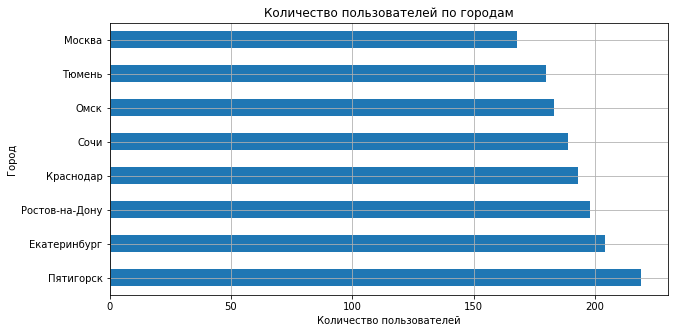

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64


In [10]:
city_count = users['city'].value_counts()
city_count.plot(
    kind='barh',
    grid=True,
    figsize=(10, 5)
)
plt.title('Количество пользователей по городам')
plt.ylabel('Город')
plt.xlabel('Количество пользователей')
plt.show()

print(city_count)

Наибольшее количество пользователей проката самоката за 2021 год в городе Пятигорск (219 клиентов), на втором месте г.Екатеринбург (204 клиента). Наименьшее количество пользователей в г.Тюмень и г.Москва(180 клиентов и 168). Непривычно видеть г.Москва по количеству пользователей на последнем месте, но думаю такой показатель связан с высокой конкуренцией среди фирм проката самокатов. Высокое количество пользвателей в городах Пятигорск, Ростов-на-Дону, Краснодар и Сочи логично, т.к. данные города располагаются в районах теплого климата за счет чего шире сезон проката.

#### 3.2. Исследование соотношения числа пользователей с подпиской и без подписки;

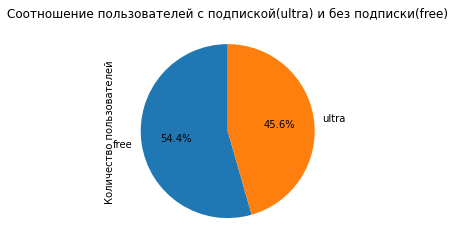

subscription_type
free     835
ultra    699
Name: user_id, dtype: int64

In [11]:
subscription_count = users.groupby('subscription_type')['user_id'].count()

subscription_count.plot(
    kind='pie',
    label='Количество пользователей',
    autopct='%1.1f%%',
    title='Соотношение пользователей с подпиской(ultra) и без подписки(free)',
    startangle=90,
)

plt.show()
subscription_count

54.4% составляют пользователи без подписки, оставшиеся 45.6% пользователи с подпиской.

#### 3.3. Исследование возраста пользователей

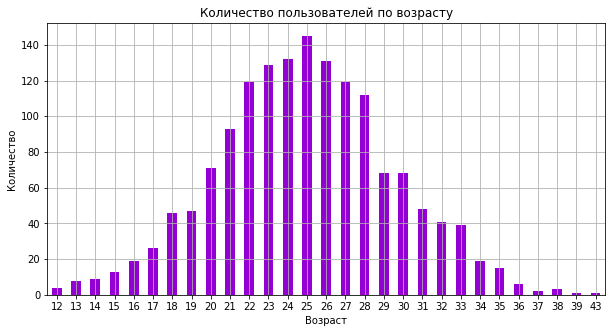

count   1,534.00
mean       24.90
std         4.57
min        12.00
25%        22.00
50%        25.00
75%        28.00
max        43.00
Name: age, dtype: float64


In [12]:
age_count = users.groupby('age')['user_id'].count()

age_count.plot(
    kind='bar',
    grid=True,
    figsize=(10, 5),
    color='darkviolet'
)
plt.xticks(rotation=0)
plt.title('Количество пользователей по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

print(users['age'].describe())

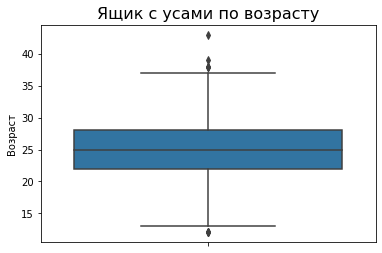

In [13]:
sns.boxplot(y='age', data=users)

plt.title('Ящик с усами по возрасту', fontsize=16)
plt.ylabel('Возраст')

plt.show()

Распределение количества клиентов по возрасту является нормальным. Среднее равное 24.9 и медиана равная 25.0 практически совпадают. Чаще всего клиентами являются люди в возрасте от 22 до 28 лет. Нехарактерными клиентами по ящику с усами являются люди в возрасте меньше 13 и больше 37 лет. Чаще всего клиентами являются именно 25-летние.

#### 3.4. Исследование расстояния, которое пользователь преодолел за одну поездку

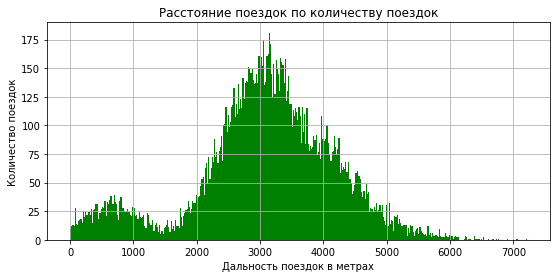

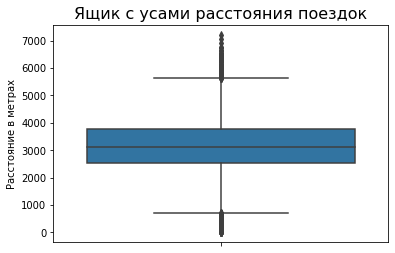

count   18,068.00
mean     3,070.66
std      1,116.83
min          0.86
25%      2,543.23
50%      3,133.61
75%      3,776.22
max      7,211.01
Name: distance, dtype: float64

In [14]:
rides['distance'].hist(
    bins=400,
    color='green',
    figsize=(9,4),
)
plt.title('Расстояние поездок по количеству поездок')
plt.xlabel('Дальность поездок в метрах')
plt.ylabel('Количество поездок')

plt.show()

sns.boxplot(y='distance', data=rides)

plt.title('Ящик с усами расстояния поездок', fontsize=16)
plt.ylabel('Расстояние в метрах')

plt.show()

rides['distance'].describe()

На гистограмме имеется два пика. Первый пик у поездок расстоянием от 500 до 1000 метров, обычно таких поездок по 20-35 штук. Второй пик высокий в него входит расстояние от 2500 до 4000 метров, в него входит медианное значение в 3133 метра, таких поездок совершается от 100 до 175 штук. Так же минимальным значением расстояния является 0.86 метра, думаю, это пользователь, который сразу после старта по каким-либо причинам решил отменить поездку на самокате. Если смотреть на ящик с усами, то характерным размахом является расстояние от 850 до 5600 метров. Посмотрим на гистограмму без выбросов.

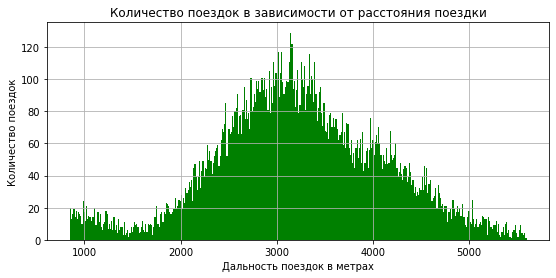

In [15]:
rides['distance'].hist(
    bins=400,
    color='green',
    figsize=(9,4),
    range=(850,5600)
)
plt.title('Количество поездок в зависимости от расстояния поездки')
plt.xlabel('Дальность поездок в метрах')
plt.ylabel('Количество поездок')
plt.show()

Так гистограмма похожа на нормальное распределение, но принимать ее во внимание не будем, так как нельзя отбрасывать остальные значения.

Самое популярное расстояние для поездок от 2500 до 4000 метров, туда входит медианное значение в 3133 метра, а количество таких поездок колеблется от 100 до 175. Минимальное зафиксированное расстояние составляет 0.86 метра, что, вероятно, связано с пользователями, отменяющими поездки сразу после старта. Это может указывать на возможность разного рода технических или продиктованных пользователем проблем. По ящику с усами был определен размах расстояний от 850 до 5600 метров, что говорит о значительном разнообразии в длине поездок. Это многообразие может быть связано с различными целями использования самокатов, от коротких поездок до более длительных маршрутов. При удалении выбросов гистограмма имеет форму, похожую на нормальное распределение, однако это наблюдение не должно игнорироваться в итоговом анализе. Исключение значений может привести к искажению результатов исследования, поэтому важно учитывать всю совокупность данных для более объективной оценки.

#### 3.5. Исследование продолжительности поездок

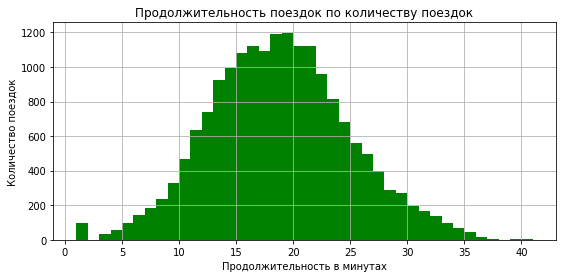

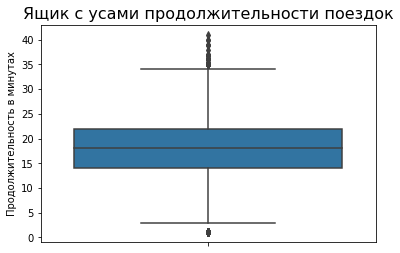

count   18,068.00
mean        18.30
std          6.09
min          1.00
25%         14.00
50%         18.00
75%         22.00
max         41.00
Name: duration, dtype: float64

In [16]:
rides['duration'].hist(
    bins=40,
    color='green',
    figsize=(9,4),
)
plt.title('Продолжительность поездок по количеству поездок')
plt.xlabel('Продолжительность в минутах')
plt.ylabel('Количество поездок')

plt.show()

sns.boxplot(y='duration', data=rides)

plt.title('Ящик с усами продолжительности поездок', fontsize=16)
plt.ylabel('Продолжительность в минутах')

plt.show()

rides['duration'].describe()

Изучим столбцы с продолжительностью поездок в 1 минуту.

In [17]:
strange_values = rides.query('duration <=1')
print(display(strange_values), strange_values.describe())

,user_id,distance,duration,date,month
6531,701,"4,196.45",1,2021-08-31,8
6570,704,"4,830.82",1,2021-10-14,10
6680,712,"4,684.00",1,2021-03-04,3
6695,713,"5,215.64",1,2021-02-25,2
6768,718,"5,197.44",1,2021-02-11,2
...,...,...,...,...,...
17004,1460,"5,531.34",1,2021-01-19,1
17242,1477,"6,724.93",1,2021-01-12,1
17314,1483,"4,445.48",1,2021-03-06,3
17505,1496,"5,722.55",1,2021-02-14,2


None        user_id  distance  duration  month
count    95.00     95.00     95.00  95.00
mean  1,092.21  5,113.18      1.00   6.48
std     244.03    658.25      0.00   3.71
min     701.00  4,030.31      1.00   1.00
25%     901.00  4,611.51      1.00   3.00
50%   1,069.00  5,052.77      1.00   6.00
75%   1,310.50  5,488.46      1.00  10.00
max   1,524.00  7,211.01      1.00  12.00


Существует 95 строк в которых значение продолжительности поездки равна 1 минуте, но расстояние при этом выше 4000 метров. Следовательно значения в 1 минуту являются аномалией. Исправлять аномальные значения не будем, передадим данные об этой ошибке фирме Go Fast.

Значения распределены нормально. Пик на 18-19 минутах. Минимальным значением является 1 минута, думаю, это все те же пользователи, которые сразу после старта по каким-либо причинам решили отменить поездку на самокате. Если смотреть на ящик с усами, то характерным размахом является время от 3 до 34 минут. Выбросами являются значения в 1 минуту и от 34 до 41. Отбрасывать данные значения не будем, они лишь говорят, в данном случае, что поездки на самокате бывают и длительными и весьма короткими, но основаная масса поездок составляет 18 минут. Это подтверждают так же показания медианы (18.00) и среднего (18.30).

#### 3.6. Промежуточный вывод

***Промежуточный вывод***  
**Цель:** провести исследовательский анализ, описать и визуализировать общую информацию о пользователях и поездках.  
**Задачи:** 
1. Исследовать частоту встречаемости городов;
2. Числа пользователей с подпиской и без;
3. Возраст пользователей;
4. Расстояние за одну поездку;
5. Продолжительность поездок.

**Результаты**
1. **Частота встречаемости городов:**
- Наибольшее количество пользователей проката наблюдается в городе Пятигорск (219 клиентов) и Екатеринбург (204 клиента).
- Наименьшее количество пользователей зафиксировано в Тюмени (180 клиентов) и Москве (168 клиентов). Уровень пользователей в Москве может быть связан с высокой конкуренцией на рынке проката самокатов.

2. **Подписка пользователей:**
- 54.4% пользователей не являются подписчиками, тогда как 45.6% имеют подписку.

3. **Возраст пользователей:**
- Возрастное распределение пользователей является нормальным. Средний возраст составляет 24.9 года, медиана — 25.0 лет. Основная аудитория — молодые люди в возрасте от 22 до 28 лет.
- Нехарактерными клиентами являются лица младше 13 и старше 37 лет.

4. **Дистанция поездок:**
- Популярное расстояние для поездок находится в диапазоне 2500–4000 метров, с медианой 3133 метра;
- Минимальное зафиксированное расстояние — 0.86 метра, что может указывать на технические или пользовательские проблемы, так как это связано с отменой поездок.
- Размах расстояний по ящику с усами составляет от 850 до 5600 метров, что подтверждает разнообразие целей и длительности поездок.

5. **Продолжительность поездок:**
- Данные о продолжительности поездок имеют нормальное распределение, с пиком на 18-19 минут;
- Минимальная продолжительность — 1 минута, что также может относиться к отмененным поездкам. Ящик с усами показал размах от 3 до 34 минут;
- Выявлена аномалия данных: поездки длиной в 1 минуту и расстоянием свыше 400 метров, таких данных 95 строк.

# Шаг 4

Объединим датафреймы, переформируем и создадим два новых с информацией по пользователям с подпиской и нет, визуализируем информацию о расстоянии и времени для данных групп пользователей.

#### 4.1. Объединение датафреймов

In [18]:
general_data = pd.merge(users, sub, on='subscription_type')
general_data = pd.merge(rides, general_data, on='user_id')

print(display(general_data.head(5)),general_data.info()) 

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,"4,409.92",26,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,"2,617.59",16,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.16,7,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,"2,694.78",19,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,"4,028.69",27,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  int64         
 3   date               18068 non-null  datetime64[ns]
 4   month              18068 non-null  int64         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  category      
 8   subscription_type  18068 non-null  category      
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: category(2), datetime64[ns](1), float64(1), int64(7), object(1)
memory usage: 1.6+ MB
None None


Объединив `users`, `rides` и `sub` получили новый датафрейм `general_data` в котором 18068 строк о 1534 пользователях, что соответсвует самому объемному датафрейму `rides` и датафрейму с информацией о пользователях `users`, и 11 столбцов. Пропуски отсутствуют.

#### 4.2. Создание новых датафреймов

In [19]:
# создание датафрейма с информацией о пользователях с подпиской
ultra_data = general_data[general_data['subscription_type'] == 'ultra']
print(display(ultra_data.head(5)),ultra_data.info())

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,"4,409.92",26,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,"2,617.59",16,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.16,7,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,"2,694.78",19,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,"4,028.69",27,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   distance           6500 non-null   float64       
 2   duration           6500 non-null   int64         
 3   date               6500 non-null   datetime64[ns]
 4   month              6500 non-null   int64         
 5   name               6500 non-null   object        
 6   age                6500 non-null   int64         
 7   city               6500 non-null   category      
 8   subscription_type  6500 non-null   category      
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: category(2), datetime64[ns](1), float64(1), int64(7), object(1)
memory usage: 571.8+ KB
None None


In [20]:
# создание датафрейма с информацией о пользователях без подписки
free_data = general_data[general_data['subscription_type'] == 'free']
print(display(free_data.head(5)),free_data.info())

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,"2,515.69",15,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.93,17,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,"4,004.43",21,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,"1,205.91",10,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,"3,047.38",18,2021-02-14,2,Айдар,22,Омск,free,8,50,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   distance           11568 non-null  float64       
 2   duration           11568 non-null  int64         
 3   date               11568 non-null  datetime64[ns]
 4   month              11568 non-null  int64         
 5   name               11568 non-null  object        
 6   age                11568 non-null  int64         
 7   city               11568 non-null  category      
 8   subscription_type  11568 non-null  category      
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: category(2), datetime64[ns](1), float64(1), int64(7), object(1)
memory usage: 1017.2+ KB
None None


В датафрейме `ultra_data` содержится 6500 строк о клиентах с подпиской, в датафрейме `free_data` содержится 11568 строк о клиентах без подписки.

#### 4.3. Визуализация информации о расстоянии и времени поездок для пользователей с подпиской и без

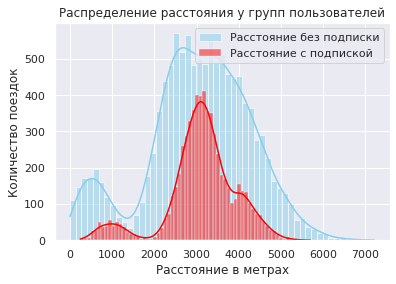

count   11,568.00
mean     3,045.50
std      1,246.17
min          0.86
25%      2,366.56
50%      3,114.65
75%      3,905.70
max      7,211.01
Name: distance, dtype: float64 count   6,500.00
mean    3,115.45
std       836.90
min       244.21
25%     2,785.44
50%     3,148.64
75%     3,560.57
max     5,699.77
Name: distance, dtype: float64


In [21]:
# визуализируем расстояние
sns.set_theme(style="darkgrid")

sns.histplot(data=free_data, x='distance', color='skyblue', label='Расстояние без подписки', kde=True)
sns.histplot(data=ultra_data, x='distance', color='red', label='Расстояние с подпиской', kde=True)

plt.title('Распределение расстояния у групп пользователей')
plt.ylabel('Количество поездок')
plt.xlabel('Расстояние в метрах')
plt.legend() 
plt.show()

print(free_data['distance'].describe(), ultra_data['distance'].describe())

Пользователи с подпиской имеют пик распределения дальности поездок по количеству поездок на расстоянии от 2500 до 3500 метров. Пользователи без подписки имеют пик данного распределения на расстоянии от 2500 до 4000 метров. У пользователей без подписки максимальная длина поездки 7211 метров, у пользователей с подпиской 5699 метров, по гистограмме можно установить, что пользователи без подписки совершают более длительные поездки, чем пользователи с подпиской. Медианные и средние значения у данных групп клиентов расположены рядом. Медиана у пользователей с подпиской равна 3148 метра, у пользователей без подписки 3114 метра. У пользователей с подпиской меньше разброс значений, тк стандартное отклонение равно 836, а у пользователей без подписки 1246. 

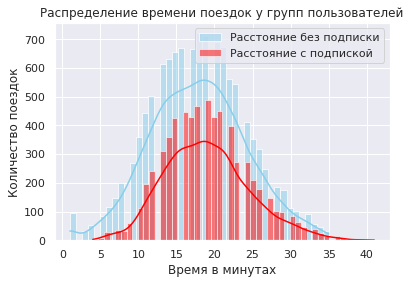

count   11,568.00
mean        17.89
std          6.33
min          1.00
25%         13.00
50%         18.00
75%         22.00
max         35.00
Name: duration, dtype: float64 count   6,500.00
mean       19.04
std         5.58
min         4.00
25%        15.00
50%        19.00
75%        22.00
max        41.00
Name: duration, dtype: float64


In [22]:
# визуализируем время
sns.set_theme(style="darkgrid")

sns.histplot(data=free_data, x='duration', color='skyblue', label='Расстояние без подписки', kde=True)
sns.histplot(data=ultra_data, x='duration', color='red', label='Расстояние с подпиской', kde=True)

plt.title('Распределение времени поездок у групп пользователей')
plt.ylabel('Количество поездок')
plt.xlabel('Время в минутах')
plt.legend() 
plt.show()
sns.reset_defaults()

print(free_data['duration'].describe(), ultra_data['duration'].describe())

Время поездок у группы с подпиской более длительное (максимальное значение 41 минута), у группы без подписки 35 минут. Распределение времени поездок у группы с подпиской является нормальным медианным значением 19 минут, у группы без подписки распределение почти нормальное с медианой равной 18 минут, как раз у данной группы наблюдается выборос значений в 1 минуту.

#### 4.4. Промежуточный вывод

***Промежуточный вывод***  
**Цель:** создать единый датафрейм, из него создать два новых датафрейма по типу подписки, визуализировать и описать о расстоянии и времени поездок у разных групп пользователей.   
**Задачи:** 
1. Создать датафрейм `general_data` из `users`, `rides`, `sub`.
2. Создать датафреймы `free_data`-включающий в себя данные о пользователях без подписки и `ultra_data`- о пользователях с подпиской.
3. Визуализировать с помощью гистограмм время и расстояние поездок у разных групп пользователей.

**Результаты**
1. **Создание датафрейма**
- В результате объединения датафреймов `users`, `rides` и `sub` получен новый датафрейм `general_data` с 18,068 строками и информацией о 1,534 пользователях, состоящий из 11 столбцов, без пропусков.
2. **Создание датафреймов по группам пользователей**
- В датафрейме `ultra_data` содержится 6,500 строк о клиентах с подпиской;
- В `free_data` — 11,568 строк о клиентах без подписки.
3. **Визуализация времени и расстояния поездок**
- Пользователи без подпиской совершают более дальние поездки, чем пользователи с подпиской;
- Пользователи с подпиской совершают более длительные поездки, чем пользователи без подписки;
- У пользователей без подписки наблюдаются поездки длительностью от 1 до 5 минут, скорее всего новые пользователи предпочитают завершить поездку сразу после начала по техническим проблемам (возможно проблема в работе приложения) или по личным причинам.

# Шаг 5

Посчитаем выручку. Для этого создадим датафрейм с данными о поездках на основе датафрейма с объединёнными данными из шага 4 и найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц, так же добавим столбец с помесячной выручкой, которую принёс каждый пользователь.

#### 5.1. Создание датафрейма и опредление ряда параметров

In [23]:
aggregated_data = general_data.groupby(['user_id','month']).agg(
    full_distance=('distance','sum'),
    dis_count=('distance','count'),
    full_duration=('duration','sum'),
    start_ride_price=('start_ride_price','median'),
    minute_price=('minute_price','median'),
    subscription_fee=('subscription_fee','median'),
    subscription_type=('subscription_type','first')
).reset_index()
display(aggregated_data.head()), aggregated_data.info()

,user_id,month,full_distance,dis_count,full_duration,start_ride_price,minute_price,subscription_fee,subscription_type
0,1,1,"7,027.51",2,42,0,6,199,ultra
1,1,4,754.16,1,7,0,6,199,ultra
2,1,8,"6,723.47",2,46,0,6,199,ultra
3,1,10,"5,809.91",2,32,0,6,199,ultra
4,1,11,"7,003.50",3,56,0,6,199,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11331 entries, 0 to 11330
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            11331 non-null  int64  
 1   month              11331 non-null  int64  
 2   full_distance      11331 non-null  float64
 3   dis_count          11331 non-null  int64  
 4   full_duration      11331 non-null  int64  
 5   start_ride_price   11331 non-null  int64  
 6   minute_price       11331 non-null  int64  
 7   subscription_fee   11331 non-null  int64  
 8   subscription_type  11331 non-null  object 
dtypes: float64(1), int64(7), object(1)
memory usage: 796.8+ KB


(None, None)

Создан аггрегированный датафрейм `aggregated_data` с данными о пользователях, месяцах поездок, так же добавлены новые столбцы: `full_distance`-  суммарное расстояние,`dis_count`- количество поездок, `full_duration`- суммарное время. Так же добавим столбцы из датафрейма `sub`, необходимые для подсчета выручки: `start_ride_price`,`minute_price`,`subscription_fee`. Всего вышло 11331 строка, пропущенных значений нет.

#### 5.2. Вычисление помесячной выручки, которую принес каждый пользователь

In [24]:
aggregated_data['monthly_revenue'] = (
    aggregated_data['start_ride_price'] * aggregated_data['dis_count'] + aggregated_data['minute_price'] * aggregated_data['full_duration'] + aggregated_data['subscription_fee']
)
aggregated_data.head()

,user_id,month,full_distance,dis_count,full_duration,start_ride_price,minute_price,subscription_fee,subscription_type,monthly_revenue
0,1,1,"7,027.51",2,42,0,6,199,ultra,451
1,1,4,754.16,1,7,0,6,199,ultra,241
2,1,8,"6,723.47",2,46,0,6,199,ultra,475
3,1,10,"5,809.91",2,32,0,6,199,ultra,391
4,1,11,"7,003.50",3,56,0,6,199,ultra,535


Получили данные о помесячной прибыли от каждого пользователя в столбце `monthly_revenue`.

#### 5.3. Промежуточный вывод

***Промежуточный вывод***  
**Цель:** посчитать помесячную выручку от каждого пользователя.  
**Задачи:**  
1. Создать аггрегированный датафрейм с информацией о суммарном расстоянии, количестве поездок и суммарном времени для каждого пользователя за каждый месяц.
2. Создать столбец с информацией о помесячной выручке от каждого пользователя.

**Результаты**
1. Создан аггрегированный датафрейм `aggregated_data` из 11331 строки с новыми столбцами `full_distance`- суммарное расстояние, `dis_count`- количество поездок, `full_duration`- суммарное время.
2. В датафрейм `aggregated_data` добавлен столбец `monthly_revenue` с помесячной выручкой.

# Шаг 6

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской для этого нужно проверить 4 гипотезы.

#### 6.1. Гипотеза 1

*Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.*

Н0: Истинные средние значения продолжительности поездок пользователей без подписки и с подпиской равны.  
Н1: Истинное средне значение продолжительности поездок пользователей с подпиской больше, чем у пользователей без подписки.  
Используем уровень статистической значимости равный 5%. Проверяем правостороннюю гипотезу.

In [25]:
alpha = 0.05
results = st.ttest_ind(
    ultra_data['duration'],
    free_data['duration'],
    alternative='greater'
)

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.4959453720736625e-34
Отвергаем нулевую гипотезу


P-значение равное 2.49 больше уровня статистической значимости, что означает, что наблюдаемое значение слишком далеко от предполагаемого в нулевой гипотезе. Следовательно мы отвергаем нулевую гипотезу.

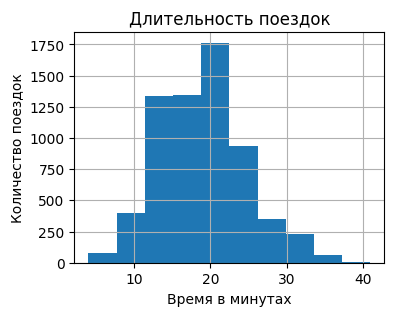

Среднее время поездок пользователей с подпиской: 19.037692307692307


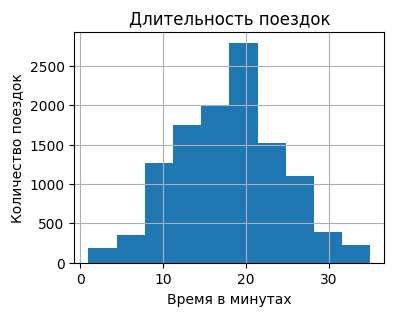

Среднее время поездок пользователей без подписки: 17.890992392807746


In [26]:
ultra_data['duration'].hist(figsize=(4,3))
plt.title('Длительность поездок')
plt.xlabel('Время в минутах')
plt.ylabel('Количество поездок')
plt.show()
print('Среднее время поездок пользователей с подпиской:', ultra_data['duration'].mean())

free_data['duration'].hist(figsize=(4,3))
plt.title('Длительность поездок')
plt.xlabel('Время в минутах')
plt.ylabel('Количество поездок')
plt.show()
print('Среднее время поездок пользователей без подписки:', free_data['duration'].mean())

**Нулевая гипотеза опровергнута.** Пользователи с подпиской действительно тратят больше времени на поездки. Данную информацию можно использовать для развития условий пользования подпиской, чтобы заинтересовать тех, кто пользуется приложением без подписки.

#### 6.2. Гипотеза 2

*Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?*

Н0: Среднее расстояние одной поездки равно 3130 метров.   
Н1: Среднее расстояние больше 3130 метров.  
Используем уровень статистической значимости равное 5%. Проверяем правосторонюю гипотезу.

In [27]:
value = 3130
alpha = 0.05

results = st.ttest_1samp(
    ultra_data['distance'],
    value,
    alternative='greater'
)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


P-значение равное 0.91 не больше статистической значимости. Нулевая гипотеза не опровергнута.

In [28]:
print('Среднее расстояние одной поездки равно:', ultra_data['distance'].mean().round(1))

Среднее расстояние одной поездки равно: 3115.4


**Нулевая гипотеза не опровергнута.** Пользователи с подпиской в среднем проезжают за одну поездку не более 3130 метров. По этим данным можно спланировать техническое обслуживание самокатов.

#### 6.3. Гипотеза 3

*Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.*

Н0: Средняя помесячная выручка от пользователей с подпиской равна помесячной выручке от пользователей без подписки.  
Н1: Средняя помесячная выручка от пользователей с подпиской выше помесячной выручки от пользователей без подписки.   
Используем уровень статистической значимости равное 5%. Проверяем правосторонюю гипотезу.

In [29]:
alpha = 0.05
results = st.ttest_ind(
    aggregated_data[aggregated_data['subscription_type']=='ultra']['monthly_revenue'],
    aggregated_data[aggregated_data['subscription_type']=='free']['monthly_revenue'],
    alternative='greater'
)

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


In [30]:
ultra_revenue = aggregated_data[aggregated_data['subscription_type']=='ultra']['monthly_revenue'].mean()
print('Средняя помесячная выручка у пользователей с подпиской:', ultra_revenue)
free_revenue = aggregated_data[aggregated_data['subscription_type']=='free']['monthly_revenue'].mean()
print('Средняя помесячная выручка у пользователей без подпиской:', free_revenue)

Средняя помесячная выручка у пользователей с подпиской: 362.7921906022502
Средняя помесячная выручка у пользователей без подпиской: 328.6413651073845


**Нулевая гипотеза опровержена.** Средняя помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.Это является дополнительным доводом в пользу улучшения условий подписки с целью привлечения пользователей, не имеющих подписки, к её приобретению.

#### 6.4. Гипотеза 4

*Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?*

Так как предлагаются два файла мы уже можем понять, что потребуется двухвыборочный t-тест. Так как речь идет об одной и той же группе испытуемых до и после эксперимента, то нужен двухвыборочный t-тест для зависимых выборок. Для реализации данного теста нужен метод из библиотеки `scipy`: `scipy.stats.ttest_rel`. Данный тест предназначен для того чтобы проверять гипотезу о равенстве среднего генеральной совокупности до и после изменения, в нашем случае пользователей которые обратились в техподдержку до и после обновления сервера. Укажем соответсвующий аргумент в параметре `alternative` в соответствии с порядком передачи выборок в метод.

#### 6.5. Промежуточный вывод

***Промежуточный вывод.***  
**Цель:** проверить гипотезы от продакт-менеджеров фирмы прокатов самокатов Go Fast.  
**Задачи:**
1. Проверить гипотезу о том, что пользователи с подпиской больше тратят времени на поездки.
2. Проверить гипотезу о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.
3. Проверить гипотезу о том, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.
4. Определить какой тест нужен для проверки гипотезы о снижении обращений клиентов в службу поддержки после обновления сервера.

**Результаты**
1. Пользователи с подпиской действительно тратят больше времени на поездки.
2. Пользователи с подпиской в среднем проезжают за одну поездку не более 3130 метров.
3. Средняя помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.
4. Для проверки гипотезы нужно применить двухвыборочный t-тест для зависимых выборок и проверить левосторонюю гипотезу.

# Шаг 7

Решим две задачи по распределению.

#### 7.1. Задача про промокоды

*Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей.  
Цель: выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.*

Нужно разослать1169количество промокодов на один бесплатный месяц, чтобы вероятность не выполнить план была примерно 0.04971


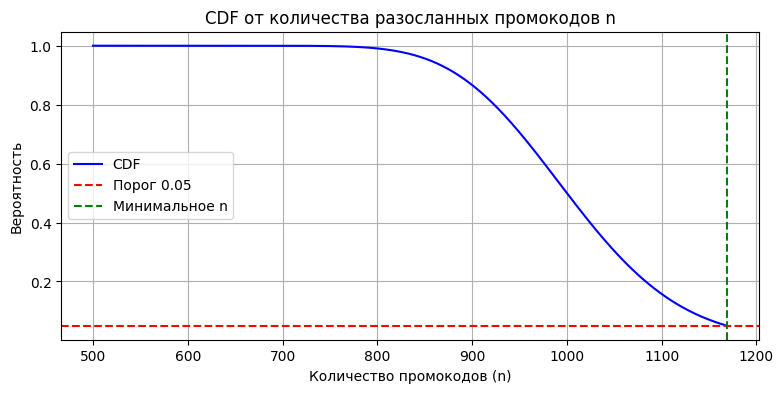

In [31]:
n = 500  
p = 0.1  
x = 100   

ns = [] 
results = []

# Цикл для подбора n
while True: 
    mu = n * p
    sigma = sqrt(n * p * (1 - p))
    distr = st.norm(mu, sigma)

    result = distr.cdf(x).round(5)
    ns.append(n)
    results.append(result)

    if result < 0.05:  
        print(f'Нужно разослать{n}количество промокодов на один бесплатный месяц, чтобы вероятность не выполнить план была примерно {result}')
        break  

    n += 1 

plt.figure(figsize=(9, 4))
plt.plot(ns, results, label='CDF', color='blue')
plt.axhline(y=0.05, color='red', linestyle='--', label='Порог 0.05')
plt.axvline(x=n, color='green', linestyle='--', label='Минимальное n')
plt.title('CDF от количества разосланных промокодов n')
plt.xlabel('Количество промокодов (n)')
plt.ylabel('Вероятность')
plt.legend()
plt.grid()
plt.show()

Применив цикл подбора такого значения `n`, при котором значение кумулятивной функции не привысило 0.05, мы выяснили, что для того чтобы получить 95% успех продления пробного периода подпиской, нужно разослать не менее 1169 промокодов на бесплатный месяц пользования приложеием.

#### 7.2. Задача про push-уведомления

*Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.*

Вероятность ,что push-уведомления откроют не более 399,5 тыс. пользователей:15.4%


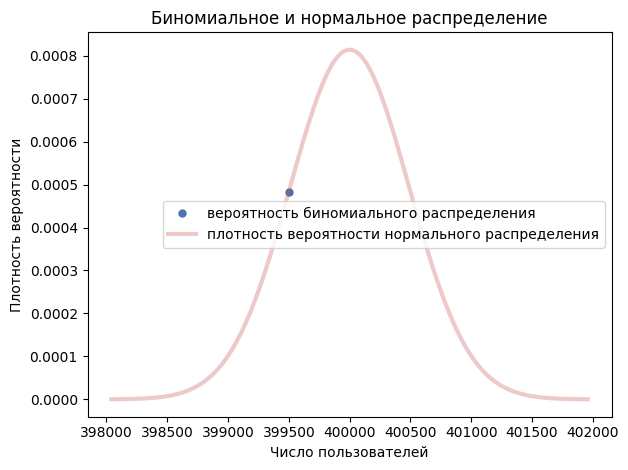

Условие выполняется


In [32]:
n = 1000000
p = 0.4

def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result

left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))

x = 399500

ax = plt.subplot()
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=5,
	      label='вероятность биномиального распределения')
mu = n * p
sigma = sqrt(n * p * (1 - p))

distr = st.norm(mu, sigma)
resul = distr.cdf(x)
print(f'Вероятность ,что push-уведомления откроют не более 399,5 тыс. пользователей:{resul.round(3) * 100}%')

x = linspace(left, right, 100)
ax.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=0.3, label='плотность вероятности нормального распределения')
 
x_ticks = np.arange(0, n + 1, 100000)  

ax.legend(loc='best')
plt.title('Биномиальное и нормальное распределение') 
plt.xlabel('Число пользователей') 
plt.ylabel('Плотность вероятности') 
plt.tight_layout()
plt.show()

if (mu - (3 * sigma) >= 0) and ((mu + (3 * sigma) <= n)):
    print('Условие выполняется')
else:
    print('Условие не выполняется')

#### 7.3. Промежуточный вывод

***Промежуточный вывод***  
**Цель:** решить две задачи от отдела маркетинга.  
**Задачи:**  
1. Выяснить сколько промокодов на месяц бесплатной подписки нужно разослать пользователям, чтобы вероятность не выполнить план по количеству пользователей продливших подписку была не более 5%.
2. Выяснить какая вероятность, что push-уведомление в мобильном приложении откроют из 1 млн. не более 399.5 тыс. пользователей.

**Результаты:**  
1. Для того, чтобы вероятность не выполнить план по количеству пользователей продливших подписку была не более 5% нужно разослать **1169** промокодов на бесплатный месяц пользованием приложением.
2. Вероятность того, что push-уведомление в мобильном приложении откроют из 1 млн. не более 399.5 тыс. пользователей составляет **15.4%**.

# Общий вывод

В ходе исследования данных фирмы проката самокатов Go Fast за 2021 год установили:  
1.**Загрузка и знакомство с данными.**
Загружено три датафрейма: `users`-1565 строк о пользователях, `rides`-18068 строк о поездках, `sub`-2 строки о видах подписки.  
2. **Предобработка данных, работа с пропусками, дубликатами.** Исправлены типы данных, проведено округление числел в столбце с продолжительностью поездок, создан новый столбец с данными о месяце поездки, проведена проверка на наличие дубликатов, в последствии была удалена 31 строка из датафрейма с данными о пользователях `users`.    
3. **Исследовательский анализ проката самокатов. Описание и визуализация общей информации о пользователях и поездках.** Наибольшее количество пользователей находится в городе Пятигорск и Екатеринбург, наименьшее количество в Москве. 54.4% пользователей пользуются приложением без подписки, 45.6% имеют подписку. Приложением пользуются в основном клиенты в возрасте от 22 до 28, больше всего 25-летних клиентов. Поездки в основном распределены в диапазоне от 2500 до 4000 метров. Среднее время поездок 18-19 минут. В ходе исследования замечена аномалия - поездки длительностью в 1 минуту и расстоянием менее 1 метра у пользователей без подписки, следует обратить внимание, возможно это связанно с проблемой в старте поездки у приложения, либо с пропаданием интереса у пользователей.  
4. **Объединение данных.** Создан единый датафрейм `general_data` из трех начальных, вклюяающий в себя 18068 строк и 11 стобцов, пропуски и дубликаты не обнаружены. Из данного датафрейма создали два датафрейма по группам пользователей: пользователи с подпиской - 6500 строк, пользователи без подписки-11568 строк. Выявлено, что пользователи без подписки совершают более дальние поездки, а пользователи с подпиской более длительные.  
5. **Подсчет выручки от каждого пользователя по месяцам.** Создан аггрегированный датафрейм `aggregated_data` из 11331 строки, в него добавлены новые столбцы с информацией необходимой для подсчета помесячной вырчуки от каждого пользователя. Отдельно в данный датафрейм добавили новый столбец с подсчитанной помесячной выручкой.   
6. **Проверка гипотез.** Проведена проверка трех практических гипотез и выбран метод для проверки одной теоретической гипотезы. В ходе проверки гипотез получили следующие результаты: пользователи с подпиской тратят больше времени на поездки; пользователи с подпиской в среднем проезжают за одну поездку не более 3130 метров; средняя помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки; для проверки теоретической гипотезы нужно применить двухвыборочный t-тест для зависимых выборок и проверить левосторонюю гипотезу.   
7. **Решение задач от отдела маркетинга.** При решении задач получили следующие результаты: для того, чтобы вероятность не выполнить план по количеству пользователей продливших подписку была не более 5% нужно разослать 1169 промокодов на бесплатный месяц пользованием приложением; вероятность того, что push-уведомление в мобильном приложении откроют из 1 млн. не более 399.5 тыс. пользователей составляет 15.4%.   

В заключение, компании Go Fast стоит уделить особое внимание привлечению пользователей, которые в настоящее время используют приложение без подписки, и разработать стратегии, направленные на конвертацию этих клиентов в подписчиков. Более того, стоит отметить, что свыше 50% клиентов пользуются сервисом без подписки, что представляет собой значительный потенциала роста доходов. 